In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import contextily as ctx

In [2]:
perimeters = gpd.read_file('hist.shp')

In [3]:
print(perimeters.shape)

(92531, 14)


In [4]:
# lets focus on San Diego county 
# Latitude and longitude bounding box for San Diego county
from shapely.geometry import Point
MIN_LAT, MAX_LAT = 32.4, 33.6
MIN_LONG, MAX_LONG = -118, -116
sd_perimeters = perimeters.cx[MIN_LONG:MAX_LONG, MIN_LAT:MAX_LAT]
print(sd_perimeters.shape)
sd_perimeters.crs = {'init' :'epsg:4326'}
sd_perimeters = sd_perimeters.to_crs(epsg=3857)
sd_perimeters.head()

(2004, 14)


,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
230,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Bonny,BLM,35.437000,None,None,None,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871..."
272,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,BORDER 15,CDF,19.854897,None,None,None,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959..."
285,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,CAMINO,CDF,2.808180,None,None,None,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396..."
589,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Horse Fire,USFS,7041.781000,None,None,None,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437..."
673,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Cottonwood,BLM,24.682000,None,None,None,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496..."


In [5]:
type(sd_perimeters.year.value_counts())

pandas.core.series.Series

In [6]:
# Range of years that cover by this dataset
print(sd_perimeters.year.sort_values().unique().astype(int))
print ('The oldest year is {} and recent year is {}'.format(sd_perimeters.year.unique().astype(int).min(),sd_perimeters.year.unique().astype(int).max()))


[1900 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
The oldest year is 1900 and recent year is 2018


In [8]:
print(sd_perimeters.shape)

(2004, 14)


In [10]:
# How many fires are reported after year of 2000
sd= sd_perimeters[sd_perimeters['year']>=2000]
print(sd.shape)

(609, 14)


In [11]:
# check how many fires 
print(sd.year.sort_values().unique().astype(int))
print(sd.year.value_counts().unique())
print(sd.year.value_counts().unique().sum())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
[80 77 56 51 43 36 33 31 25 23 21 20 18 15 12 10  4]
555


In [12]:
sd.year.count()

609

In [15]:
# how many fires per year 
sd['year'].value_counts()

2007.0    80
2012.0    77
2014.0    56
2013.0    51
2006.0    43
2010.0    36
2005.0    36
2011.0    33
2004.0    31
2008.0    25
2016.0    23
2009.0    21
2017.0    20
2002.0    18
2018.0    18
2003.0    15
2015.0    12
2000.0    10
2001.0     4
Name: year, dtype: int64

In [222]:

sd[sd['year'] == 2001.0]['cont_date'].isnull().sum()

3

In [223]:
# Checking none values for each attributes 
sd['cont_date'].isnull().sum()

352

In [224]:
sd['alarm_date'].isnull().sum()

336

In [225]:
sd['perimeter_'].isnull().sum()

276

In [226]:
sd['fire_name'].isnull().sum()

3

In [227]:
sd['geometry'].isnull().sum()

0

In [228]:
sd['acres'].isnull().sum()

0

In [229]:
sd.perimeter_.isnull().sum()

276

In [230]:
y=  '2006-06-06'
y.split("-")[2]
#q=y.apply(lambda x:(x.split("-") if x in not None else x))
data = np.array(['2006-06-06','2006-07-15']) 
ser = pd.Series(data) 
ser

0    2006-06-06
1    2006-07-15
dtype: object

In [231]:
# checking oldest and newer year 
print(sd.perimeter_.head())
m= sd.perimeter_.isnull()
n =~m 
splitter = sd[n].perimeter_.apply(lambda x: (x.split("-") if x is not None else x))
y,m,d= splitter.apply(lambda x:x[0]), splitter.apply(lambda x:x[1]), splitter.apply(lambda x:x[2])
print(y.astype(int).describe())

230    2006-06-06
272    2006-07-15
285    2006-02-09
589    2006-07-24
673    2006-05-03
Name: perimeter_, dtype: object
count     333.000000
mean     2011.579580
std         3.610202
min      2006.000000
25%      2008.000000
50%      2012.000000
75%      2014.000000
max      2018.000000
Name: perimeter_, dtype: float64


In [232]:
# check for yers where alarm data_date/cont_date has been use
sd.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry
230,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Bonny,BLM,35.437000,None,None,None,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871..."
272,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,BORDER 15,CDF,19.854897,None,None,None,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959..."
285,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,CAMINO,CDF,2.808180,None,None,None,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396..."
589,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Horse Fire,USFS,7041.781000,None,None,None,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437..."
673,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Cottonwood,BLM,24.682000,None,None,None,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496..."


In [16]:
# Filing missing alarm date values with perimeter_ values .As result, get complete alarm_date 
sd['alarm_date']= sd['alarm_date'].fillna(sd['perimeter_'])

C:\Users\seafu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
print(sd.alarm_date.head())

230    2006-06-06
272    2006-07-15
285    2006-02-09
589    2006-07-24
673    2006-05-03
Name: alarm_date, dtype: object


In [18]:
m= sd.alarm_date.isnull()
n =~m 
splitter = sd[n].alarm_date.apply(lambda x: (x.split("-") if x is not None else x))
y,m,d= splitter.apply(lambda x:x[0]), splitter.apply(lambda x:x[1]), splitter.apply(lambda x:x[2])
print(y.astype(int).describe())

count     606.000000
mean     2009.693069
std         4.377423
min      2000.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2018.000000
Name: alarm_date, dtype: float64


In [19]:
sd['Year'] = y
sd['month'] = m
sd['day'] = d

C:\Users\seafu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\seafu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\seafu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [20]:
# only three dates are missing 
print(sd['alarm_date'].isnull().sum())
# Shape of SD dataset for san diego from 2000 to 2020
print(sd.shape)

3
(609, 17)


In [21]:
sd.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry,Year,month,day
230,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Bonny,BLM,35.437000,None,None,2006-06-06,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871...",2006,06,06
272,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,BORDER 15,CDF,19.854897,None,None,2006-07-15,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959...",2006,07,15
285,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,CAMINO,CDF,2.808180,None,None,2006-02-09,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396...",2006,02,09
589,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Horse Fire,USFS,7041.781000,None,None,2006-07-24,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437...",2006,07,24
673,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Cottonwood,BLM,24.682000,None,None,2006-05-03,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496...",2006,05,03


In [22]:
print(sd.shape)
print(sd.perimeter_.isnull().sum())


(609, 17)
276


In [23]:
# Remove none values
sd = sd.dropna(axis=0, subset=['alarm_date'])

In [24]:
sd.alarm_date.isnull().sum()

0

In [29]:

o =[sd['year'].astype(int) == sd['Year'].astype(int)]
oo=np.array(o)
np.unique(oo)

array([False,  True])

In [30]:
sd.head()

,id,year,fire_name,agency,acres,mapmethod,inciwebid,alarm_date,cont_date,comments,complex_na,perimeter_,cause,geometry,Year,month,day
230,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Bonny,BLM,35.437000,None,None,2006-06-06,None,None,None,2006-06-06,None,"POLYGON ((-12995890.859 3957307.752, -12995871...",2006,06,06
272,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,BORDER 15,CDF,19.854897,None,None,2006-07-15,None,GPS Ground; No entry in FireCode,None,2006-07-15,None,"POLYGON ((-12979988.108 3839621.915, -12979959...",2006,07,15
285,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,CAMINO,CDF,2.808180,None,None,2006-02-09,None,No entry in FireCode,None,2006-02-09,None,"POLYGON ((-13043399.240 3931031.704, -13043396...",2006,02,09
589,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Horse Fire,USFS,7041.781000,None,None,2006-07-24,None,None,None,2006-07-24,None,"POLYGON ((-12987535.465 3863086.369, -12987437...",2006,07,24
673,view_historical_fires.fid--6c64548_17013a0304a...,2006.0,Cottonwood,BLM,24.682000,None,None,2006-05-03,None,None,None,2006-05-03,None,"POLYGON ((-12950472.197 3869481.934, -12950496...",2006,05,03


In [33]:
# in order to identify quality issues.
print(perimeters.perimeter_.head())
mask = ~perimeters.perimeter_.isna()
splitter = perimeters[mask].perimeter_.apply(lambda x: (x.split("-") if x is not None else x))
y, m, d = splitter.apply(lambda x: x[0]), splitter.apply(lambda x: x[1]), splitter.apply(lambda x: x[2])

0    2006-09-09
1    2006-09-09
2    2006-09-09
3    2006-09-08
4    2006-09-08
Name: perimeter_, dtype: object


In [34]:
sd.columns

Index(['id', 'year', 'fire_name', 'agency', 'acres', 'mapmethod', 'inciwebid',
       'alarm_date', 'cont_date', 'comments', 'complex_na', 'perimeter_',
       'cause', 'geometry', 'Year', 'month', 'day'],
      dtype='object')

In [35]:
sd[sd['year'] == 2001.0]['alarm_date']

68607    2001-12-08
71806    2001-07-09
71807    2001-01-03
Name: alarm_date, dtype: object

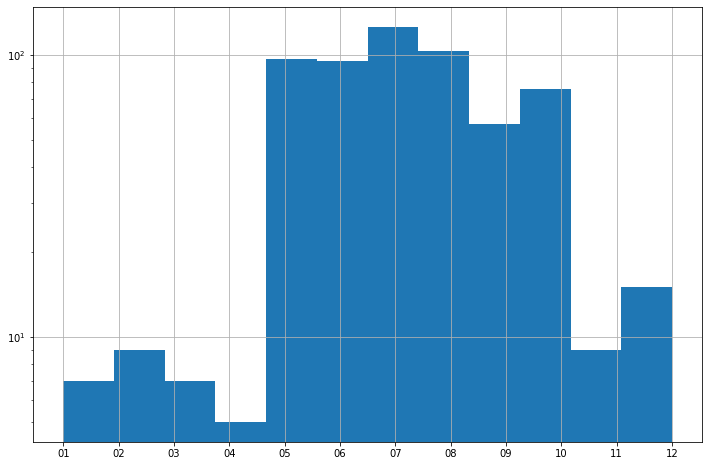

In [39]:
#Check fire distrubtion over months/seasons 
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sd.month.sort_values().hist(bins=12, log=True)

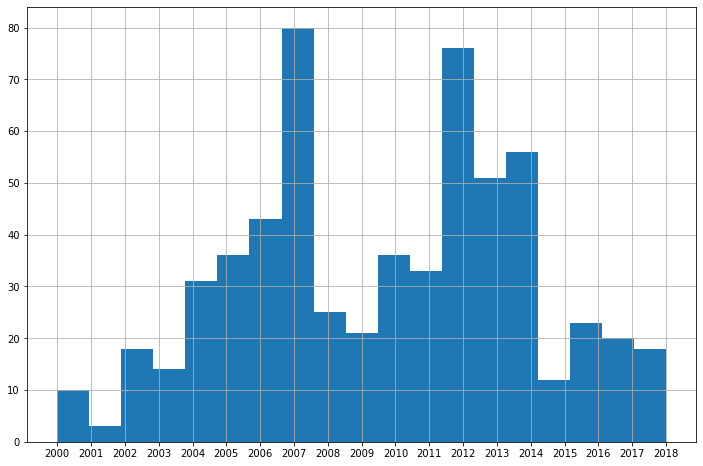

In [301]:
#Check number of fires during period of 2000 to 2018 
n_bins = len(sd.year.astype(int).value_counts())
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sd.year.astype(int).hist(ax=ax, bins=n_bins)
low, hi  = sd.year.astype(int).min(), sd.year.astype(int).max()
ax.set_xticks(range(low, hi + 1));

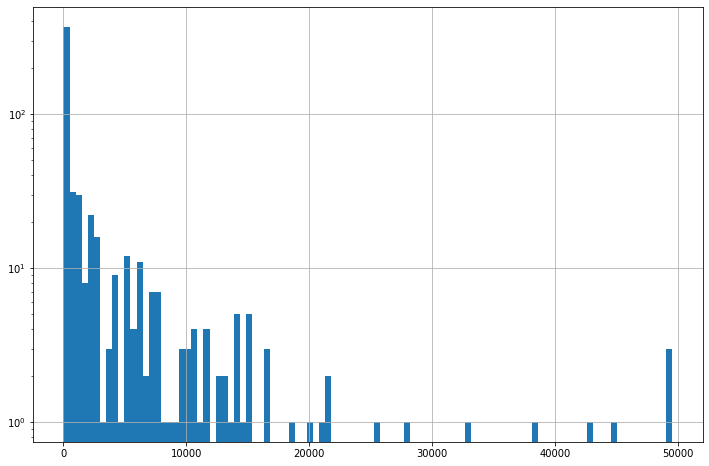

In [51]:
# check acres distrubiton 
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
mask = sd.acres < 50000
sd[mask].acres.hist(bins=100, log=True)

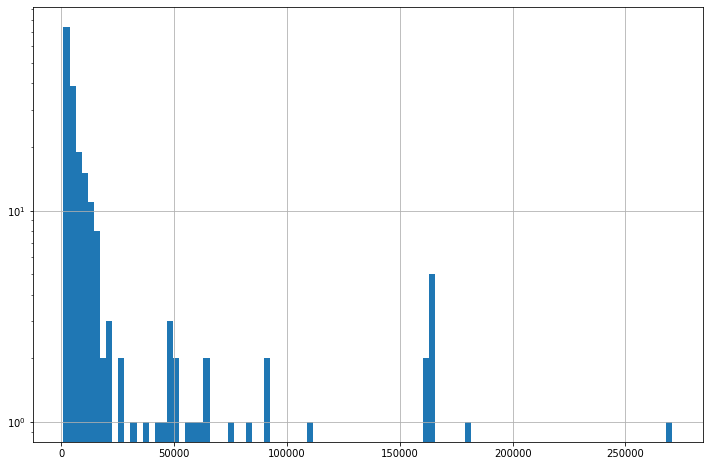

In [52]:
# check the most important fires which assumed the burn is greater 1000
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
mask = sd.acres  > 1000
sd[mask].acres.hist(bins=100, log=True)

In [ ]:
# Check if there is any duplication. Some fires has the same date but different agency or acres or...
# My assumption of duplication where these attributes are matching 

In [40]:
sd.columns 

Index(['id', 'year', 'fire_name', 'agency', 'acres', 'mapmethod', 'inciwebid',
       'alarm_date', 'cont_date', 'comments', 'complex_na', 'perimeter_',
       'cause', 'geometry', 'Year', 'month', 'day'],
      dtype='object')

In [86]:
sd.shape

(606, 17)

In [89]:
sd_unique =sd[['year', 'fire_name', 'agency', 'acres', 'mapmethod', 'inciwebid',
       'alarm_date','geometry']]
sd_unique.duplicated().shape

(606,)

In [90]:
sd_unique =sd[['year', 'fire_name', 'agency', 'acres',
       'alarm_date','geometry']]
sd_unique.duplicated().shape

(606,)

In [92]:
sd_unique =sd[['alarm_date']]
sd_unique.duplicated().shape

(606,)

In [113]:
# Check if there is any duplication values /rows 
s18 = sd[sd['Year'] == '2018']
s18c = s18[['alarm_date','acres','fire_name', 'geometry','mapmethod','inciwebid']]
s18c.duplicated()

52816    False
52922    False
53091    False
53493    False
53589    False
53844    False
54179    False
54247    False
54289    False
54515    False
54522    False
54671    False
55106     True
55112     True
55116    False
55286    False
55624    False
55671    False
dtype: bool

In [114]:
s18c

,alarm_date,acres,fire_name,geometry,mapmethod,inciwebid
52816,2018-07-06,687.971375,WEST,"POLYGON ((-12996380.974 3871787.180, -12996940...",Hand Sketch,None
52922,2018-07-08,509.281330,WEST,"POLYGON ((-12997184.005 3871787.996, -12997363...",GPS-Walked,None
53091,2018-07-28,327.586114,PASQUAL,"POLYGON ((-13015305.226 3904875.049, -13015306...",Hand Sketch,None
53493,2018-05-09,7.243643,MONTE,"POLYGON ((-12998169.350 3881263.407, -12998171...",Other,None
53589,2018-06-03,176.242850,ALISO,"POLYGON ((-13106886.403 3968107.052, -13106967...",Mixed Methods,None
53844,2018-07-28,222.283035,RIBBON,"MULTIPOLYGON (((-12972634.933 3974013.432, -12...",Infrared Image,None
54179,2018-06-05,175.718593,ALISO,"POLYGON ((-13107531.116 3968695.883, -13107535...",Infrared Image,None
54247,2018-06-03,175.718593,ALISO,"POLYGON ((-13107531.116 3968695.883, -13107535...",Mixed Methods,None
54289,2018-06-04,175.718593,ALISO,"POLYGON ((-13107531.116 3968695.883, -13107535...",Mixed Methods,None
54515,2018-06-07,217.477791,RECYCLE,"POLYGON ((-12962822.569 3848264.181, -12962850...",Hand Sketch,None


In [303]:
# Check if there is any none values for each attributes . Importanly alarm_date, gemotry and acres dont have none values 
sd.agency.isnull().sum()

5

In [48]:
sd.alarm_date.isnull().sum()

0

In [49]:
sd.acres.isnull().sum()

0

In [50]:
sd.geometry.isnull().sum()

0

In [41]:
sd.fire_name.isnull().sum()

2

In [42]:
sd.acres.isnull().sum()

0

In [43]:
sd.mapmethod.isnull().sum()

545

In [44]:
sd.inciwebid.isnull().sum()


582

In [45]:
sd.comments.isnull().sum()


378

In [46]:
sd.complex_na.isnull().sum()


606

In [47]:
sd.cause.isnull().sum()


337

In [308]:
sd.shape

(606, 17)

array(['2018-07-06', '2018-07-08', '2018-07-28', '2018-05-09',
       '2018-06-03', '2018-06-05', '2018-06-04', '2018-06-07',
       '2018-07-30', '2018-07-13', '2018-07-29', '2018-07-25'],
      dtype=object)

array([False])

In [84]:
s18c=s18[['fire_name','agency','acres']]